In [339]:
import pandas as pd
import numpy as np
import netCDF4
import scipy
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import csv

from prophet import Prophet


import xarray as xr



In [77]:
pwd


'/mnt/c/Users/2toth/Desktop/546/project'

In [78]:
filename = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.SOLIN.200001-209912.nc'
#ds = xr.open_dataset('filename')
#df = ds.to_dataframe()

In [91]:

precip_nc_file = filename
nc = netCDF4.Dataset(precip_nc_file, mode='r')

nc.variables.keys()
print(nc.variables.keys())
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time_var = nc.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)
sol = nc.variables['SOLIN'][:]
np.shape(sol)

#insol = pd.DataFrame(precip)

# a pandas.Series designed for time series of a 2D lat,lon grid
#precip_ts = pd.Series(precip, index=dtime) 

#precip_ts.to_csv('precip.csv',index=True, header=True)

dict_keys(['lev', 'hyam', 'hybm', 'ilev', 'hyai', 'hybi', 'P0', 'time', 'date', 'datesec', 'lat', 'lon', 'slat', 'slon', 'w_stag', 'time_bnds', 'date_written', 'time_written', 'ntrm', 'ntrn', 'ntrk', 'ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'nlon', 'wnummax', 'gw', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n2ovmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph', 'SOLIN'])


(1200, 192, 288)

In [405]:
time_var[:]

masked_array(data=[625641., 625669., 625700., ..., 662049., 662079.,
                   662110.],
             mask=False,
       fill_value=1e+20)

In [93]:
lat

masked_array(data=[-90.        , -89.05759162, -88.11518325, -87.17277487,
                   -86.23036649, -85.28795812, -84.34554974, -83.40314136,
                   -82.46073298, -81.51832461, -80.57591623, -79.63350785,
                   -78.69109948, -77.7486911 , -76.80628272, -75.86387435,
                   -74.92146597, -73.97905759, -73.03664921, -72.09424084,
                   -71.15183246, -70.20942408, -69.26701571, -68.32460733,
                   -67.38219895, -66.43979058, -65.4973822 , -64.55497382,
                   -63.61256545, -62.67015707, -61.72774869, -60.78534031,
                   -59.84293194, -58.90052356, -57.95811518, -57.01570681,
                   -56.07329843, -55.13089005, -54.18848168, -53.2460733 ,
                   -52.30366492, -51.36125654, -50.41884817, -49.47643979,
                   -48.53403141, -47.59162304, -46.64921466, -45.70680628,
                   -44.76439791, -43.82198953, -42.87958115, -41.93717277,
                   -40.99

In [102]:
np.shape(lat)

(192,)

In [94]:

latint = np.where((lat >= 46) & (lat <= 49))
latint

(array([145, 146, 147]),)

In [95]:
lat[latint]

masked_array(data=[46.64921466, 47.59162304, 48.53403141],
             mask=False,
       fill_value=1e+20)

In [96]:
lon

masked_array(data=[  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,
                     8.75,  10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,
                    17.5 ,  18.75,  20.  ,  21.25,  22.5 ,  23.75,  25.  ,
                    26.25,  27.5 ,  28.75,  30.  ,  31.25,  32.5 ,  33.75,
                    35.  ,  36.25,  37.5 ,  38.75,  40.  ,  41.25,  42.5 ,
                    43.75,  45.  ,  46.25,  47.5 ,  48.75,  50.  ,  51.25,
                    52.5 ,  53.75,  55.  ,  56.25,  57.5 ,  58.75,  60.  ,
                    61.25,  62.5 ,  63.75,  65.  ,  66.25,  67.5 ,  68.75,
                    70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,  77.5 ,
                    78.75,  80.  ,  81.25,  82.5 ,  83.75,  85.  ,  86.25,
                    87.5 ,  88.75,  90.  ,  91.25,  92.5 ,  93.75,  95.  ,
                    96.25,  97.5 ,  98.75, 100.  , 101.25, 102.5 , 103.75,
                   105.  , 106.25, 107.5 , 108.75, 110.  , 111.25, 112.5 ,
                   113.75

In [97]:
lonint = np.where((lon >= 360-124) & (lon <= 360-117))
lonint

(array([189, 190, 191, 192, 193, 194]),)

In [98]:
lon[lonint]

masked_array(data=[236.25, 237.5 , 238.75, 240.  , 241.25, 242.5 ],
             mask=False,
       fill_value=1e+20)

In [99]:
time_var[:]

masked_array(data=[625641., 625669., 625700., ..., 662049., 662079.,
                   662110.],
             mask=False,
       fill_value=1e+20)

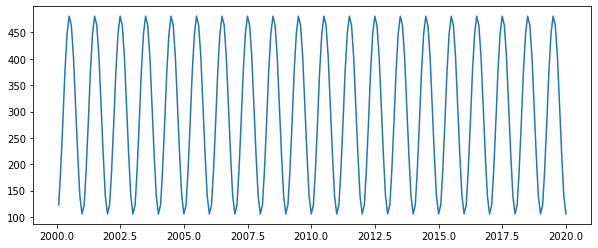

In [287]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(time_var[0:int(0.2*1200)]/365+286,sol[0:int(0.2*1200),latint[0][1],lonint[0][2]])

In [328]:
model = ARIMA(sol[0:int(0.2*1200),latint[0][1],lonint[0][2]],exog =time_var[0:int(0.2*1200)]/365+286, order=(5,1,0))
model_fit = model.fit()

In [329]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -467.187
Date:                Mon, 28 Feb 2022   AIC                            948.375
Time:                        16:03:41   BIC                            972.710
Sample:                             0   HQIC                           958.181
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7325      2.779     -0.264      0.792      -6.180       4.715
ar.L1          1.1301      0.183      6.161      0.000       0.771       1.490
ar.L2         -0.3608      0.235     -1.536      0.1

['trend',
 'exog',
 'ar',
 'ma',
 'seasonal_ar',
 'seasonal_ma',
 'exog_variance',
 'measurement_variance',
 'variance']

In [331]:
pred_sol = model_fit.predict(start = 0, end = 599, exog = time_var[240:600]/365+286)
#pred_sol = model_fit.predict(start =  time_var[0], end = time_var[599])
len(pred_sol)

600

In [332]:
len(time_var[:])

1200

In [333]:
pred = []

#pred.append(model_fit.forecast()[0])

In [334]:
pred

[]

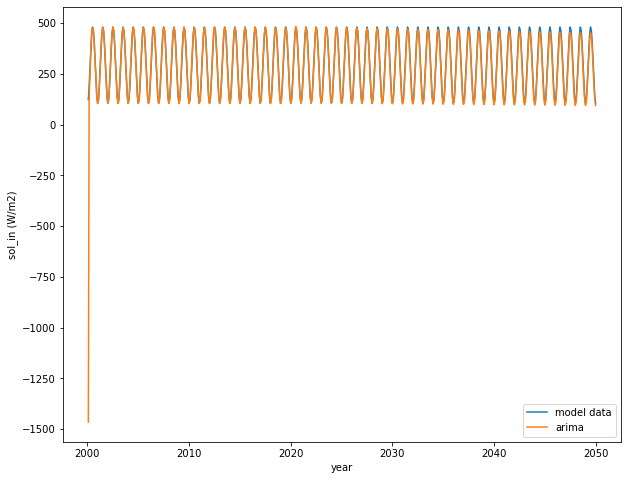

In [335]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(time_var[0:600]/365+286,sol[0:600,latint[0][1],lonint[0][2]],label = 'model data')
ax.plot(time_var[0:600]/365+286,pred_sol, label = 'arima')
ax.set_xlabel('year')
ax.set_ylabel('sol_in (W/m2)')
ax.legend()

In [154]:
model2 = ARIMA(sol[0:int(0.2*1200),latint[0][1],lonint[0][2]], order=(5,1,0))
model_fit2 = model.fit()

In [162]:
a = model_fit2.forecast()[0]

In [160]:
a[0]


122.94975293203328

In [342]:
pwd

'/mnt/c/Users/2toth/Desktop/546/project'

In [345]:
fields = ['data', 'sol_in']

data = np.array([time_var[:],sol[:,latint[0][1],lonint[0][2]]]).T

In [346]:
filename = 'data.csv'

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(data)

In [363]:
t0 = time_var[0]*24*60*60
t0

54055382400.0

In [368]:
from datetime import datetime
from datetime import date
datetime.fromtimestamp(t0).strftime( "%Y/%m/%d")
#'Sunday, January 29, 2017 08:30:00'

'3682/12/11'

In [423]:
f_date = date(2000, 1, 1)
#l_date = date(1969, 12, 31)
l_date = date(317, 1, 3)
delta = l_date - f_date
delta.days

-614701

In [424]:
timefordate = time_var[:]*24*60*60+delta.days*24*60*60

for k in range(len(timefordate)):
    timefordate[k] = int(timefordate[k])
timefordate


masked_array(data=[9.4521600e+08, 9.4763520e+08, 9.5031360e+08, ...,
                   4.0908672e+09, 4.0934592e+09, 4.0961376e+09],
             mask=False,
       fill_value=1e+20)

In [425]:
(timefordate[0]-timefordate[1])/60/60/24

-28.0

In [426]:
time_var[0]-time_var[1]

-28.0

In [427]:
datelist = []
for k in range(len(timefordate)):
    datelist.append(datetime.fromtimestamp(timefordate[k]).strftime( "%Y/%m/%d"))
datelist

['1999/12/14',
 '2000/01/11',
 '2000/02/11',
 '2000/03/12',
 '2000/04/12',
 '2000/05/12',
 '2000/06/12',
 '2000/07/13',
 '2000/08/12',
 '2000/09/12',
 '2000/10/12',
 '2000/11/12',
 '2000/12/13',
 '2001/01/10',
 '2001/02/10',
 '2001/03/12',
 '2001/04/12',
 '2001/05/12',
 '2001/06/12',
 '2001/07/13',
 '2001/08/12',
 '2001/09/12',
 '2001/10/12',
 '2001/11/12',
 '2001/12/13',
 '2002/01/10',
 '2002/02/10',
 '2002/03/12',
 '2002/04/12',
 '2002/05/12',
 '2002/06/12',
 '2002/07/13',
 '2002/08/12',
 '2002/09/12',
 '2002/10/12',
 '2002/11/12',
 '2002/12/13',
 '2003/01/10',
 '2003/02/10',
 '2003/03/12',
 '2003/04/12',
 '2003/05/12',
 '2003/06/12',
 '2003/07/13',
 '2003/08/12',
 '2003/09/12',
 '2003/10/12',
 '2003/11/12',
 '2003/12/13',
 '2004/01/10',
 '2004/02/10',
 '2004/03/11',
 '2004/04/11',
 '2004/05/11',
 '2004/06/11',
 '2004/07/12',
 '2004/08/11',
 '2004/09/11',
 '2004/10/11',
 '2004/11/11',
 '2004/12/12',
 '2005/01/09',
 '2005/02/09',
 '2005/03/11',
 '2005/04/11',
 '2005/05/11',
 '2005/06/

In [443]:
fields = ['ds', 'y']

data2 = [datelist,sol[:,latint[0][1],lonint[0][2]].T]

In [444]:
sol[:,latint[0][1],lonint[0][2]].T

masked_array(data=[122.973495, 186.93248 , 278.5098  , ..., 218.18614 ,
                   140.44003 , 105.90452 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [445]:
data2 = np.array(data2).T

In [446]:
filename = 'data2.csv'

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(data2)

In [447]:
filename2 = 'data2.csv'

df = pd.read_csv(filename2)

In [448]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -132.347


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3445.94    0.00124106       65.8979           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       3445.97   0.000166774         77.22   2.755e-06       0.001      191  LS failed, Hessian reset 
     131       3445.98   3.12184e-05        68.623   5.453e-07       0.001      265  LS failed, Hessian reset 
     155       3445.98   1.00793e-06       63.9659   4.825e-08       0.001      356  LS failed, Hessian reset 
     166       3445.98   8.66749e-07        18.842    2.24e-08       0.001      409  LS failed, Hessian reset 
     167       3445.98   1.56516e-07       32.0784      0.3262      0.7252      414   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [450]:
future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1560,2100-10-15,119.858690,97.297444,140.941353
1561,2100-10-16,118.834802,98.708133,140.036065
1562,2100-10-17,117.853611,97.578724,139.130206
1563,2100-10-18,116.911561,97.633050,139.744462
1564,2100-10-19,116.005408,94.723234,137.443955


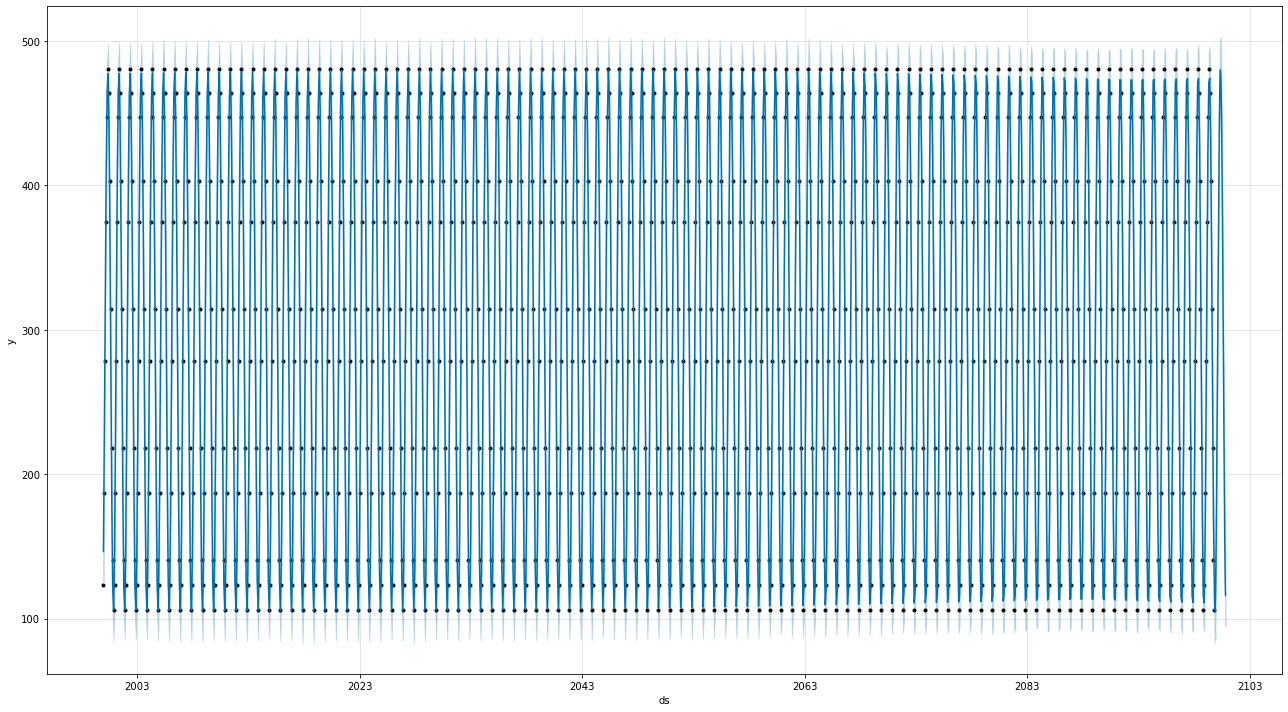

In [452]:
fig1 = m.plot(forecast, figsize=(18,10))
